In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Data/SAML-D.csv")
pd.set_option("display.max_columns",None)

suspicious_trans data: 2556986


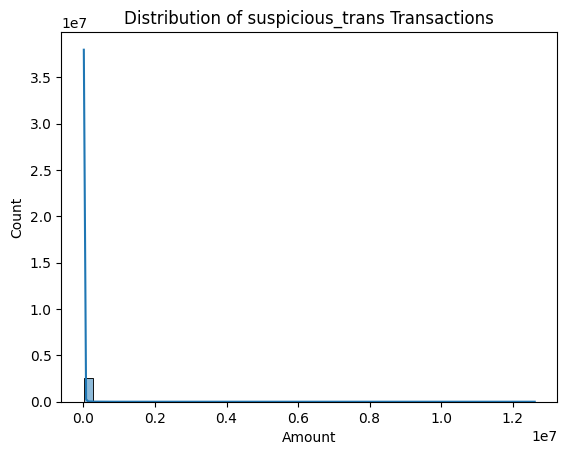

In [ ]:
threshold = 10000 
suspicious_trans = df[df['Amount'] > threshold]
print(f"suspicious_trans data: {len(suspicious_trans)}")
sns.histplot(suspicious_trans['Amount'], bins=50, kde=True)
plt.title('Distribution of suspicious_trans Transactions')
plt.show()

In [ ]:
suspicious_trans['Amount'].describe()

count    2.556986e+06
mean     2.097620e+04
std      4.701147e+04
min      1.000001e+04
25%      1.181089e+04
50%      1.448360e+04
75%      1.956727e+04
max      1.261850e+07
Name: Amount, dtype: float64

The mean (20,976.20) is much higher than the median (14,483.60), indicating the presence of some very large transactions (right-skewed distribution).
The standard deviation (47,011.47) is high, reinforcing the presence of extreme values.</br>
A few transactions are in the millions, significantly influencing the dataset.</br>

In [5]:
suspicious_trans['Date'] = pd.to_datetime(suspicious_trans['Date'], format='%Y-%m-%d')
suspicious_trans['Date'].dt.year.unique()

C:\Users\lang-chain\AppData\Local\Temp\ipykernel_9476\4187137544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspicious_trans['Date'] = pd.to_datetime(suspicious_trans['Date'], format='%Y-%m-%d')


array([2022, 2023], dtype=int32)

In [10]:
suspicious_trans['Time'] = pd.to_datetime(suspicious_trans['Time'],format="%H:%M:%S")
suspicious_trans['hours'] = suspicious_trans['Time'].dt.hour
suspicious_trans['month'] = suspicious_trans['Date'].dt.month
suspicious_trans['year'] = suspicious_trans['Date'].dt.year

C:\Users\lang-chain\AppData\Local\Temp\ipykernel_9476\3680283002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspicious_trans['Time'] = pd.to_datetime(suspicious_trans['Time'],format="%H:%M:%S")
C:\Users\lang-chain\AppData\Local\Temp\ipykernel_9476\3680283002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspicious_trans['hours'] = suspicious_trans['Time'].dt.hour
C:\Users\lang-chain\AppData\Local\Temp\ipykernel_9476\3680283002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [7]:
suspicious_trans.groupby('hours')['Sender_account']\
    .size().reset_index(name='count')\
    .sort_values(by='count', ascending=False).\
    reset_index(drop=True)

,hours,count
0,15,144638
1,12,144217
2,18,144201
3,14,144192
4,19,144125
5,13,144120
6,8,143902
7,17,143825
8,22,143812
9,11,143770


In [8]:
suspicious_trans_laundering_yes = suspicious_trans[suspicious_trans['Is_laundering']==0]
suspicious_trans_laundering_no = suspicious_trans[suspicious_trans['Is_laundering']==1]

In [9]:
suspicious_trans_laundering_yes.groupby('hours')['Sender_account']\
    .size().reset_index(name='count')\
    .sort_values(by='count', ascending=False).\
    reset_index(drop=True)

,hours,count
0,15,144528
1,12,144081
2,18,144067
3,14,144066
4,19,143989
5,13,143971
6,8,143769
7,17,143685
8,22,143677
9,11,143635


Transactions are highly concentrated between 8 AM – 11 PM (peak hours).</br>
The top 5 hours (15, 12, 18, 14, 19) have nearly equal transaction counts (~144K each). </br>
There is a sharp drop after 11 PM and before 6 AM, suggesting laundering activity is much lower during midnight to early morning. </br>
The lowest transaction counts appear at 0, 1, 2, 3, 4, 5, 6, and 7 AM (between 31K and 32K) </br>

In [11]:
suspicious_trans_laundering_no.groupby('hours')['Sender_account']\
    .size().reset_index(name='count')\
    .sort_values(by='count', ascending=False).\
    reset_index(drop=True)

,hours,count
0,21,163
1,13,149
2,23,140
3,16,140
4,17,140
5,12,136
6,19,136
7,11,135
8,22,135
9,18,134


The highest non-laundering transactions occur at 21:00 (9 PM), but with only 163 transactions.</br>
Overall transaction volume is very low (in the hundreds), compared to laundering transactions in the hundreds of thousands. </br>
Non-laundering transactions appear more evenly spread throughout the day, rather than being concentrated during specific peak hours. </br>
The lowest counts occur between 12 AM – 6 AM, similar to the laundering group. </br>

Suspicious laundering transactions are 1000x higher than non-laundering transactions at every hour.</br>
Laundering transactions have clear peak hours (8 AM – 11 PM), while non-laundering transactions are more evenly distributed.</br>
Money laundering transactions peak in the afternoon (12 PM – 7 PM), possibly because these are business hours when financial activity is high.</br>
Non-laundering transactions peak at 9 PM, which is different from the laundering trend.</br>

The laundering activity is likely taking advantage of business hours when financial transactions are common and harder to detect.</br>
Low laundering activity between midnight and early morning could indicate that fraudsters avoid triggering alerts during periods of low financial activity.</br>

In [12]:
suspicious_trans.groupby(suspicious_trans['month'])['Sender_account'].size() \
    .reset_index(name='count_sender') \
    .sort_values(by='count_sender', ascending=False) \
    .reset_index(drop=True)

,month,count_sender
0,5,247655
1,3,245479
2,4,245072
3,6,244642
4,1,244517
5,7,243963
6,2,242863
7,12,241688
8,11,235734
9,10,188153


In [13]:
suspicious_trans_laundering_yes.groupby(suspicious_trans_laundering_yes['Date'].dt.month)['Sender_account'].size() \
    .reset_index(name='count_sender') \
    .sort_values(by='count_sender', ascending=False) \
    .reset_index(drop=True)

,Date,count_sender
0,5,247418
1,3,245241
2,4,244823
3,6,244411
4,1,244281
5,7,243734
6,2,242599
7,12,241457
8,11,235575
9,10,187999


In [14]:
suspicious_trans_laundering_no.groupby(suspicious_trans_laundering_no['Date'].dt.month)['Sender_account'].size() \
    .reset_index(name='count_sender') \
    .sort_values(by='count_sender', ascending=False) \
    .reset_index(drop=True)

,Date,count_sender
0,2,264
1,4,249
2,3,238
3,5,237
4,1,236
5,6,231
6,12,231
7,7,229
8,8,168
9,11,159


In [15]:
monthly_interaction_counts = suspicious_trans.groupby(['Sender_account','Receiver_account','month']).\
    size().reset_index(name='total_interaction').\
    sort_values(by = 'total_interaction',ascending = False).reset_index(drop = True)

In [16]:
monthly_interaction_counts

,Sender_account,Receiver_account,month,total_interaction
0,9999156867,4113725358,5,13
1,9999156867,8852701392,5,13
2,9999156867,2397028701,5,13
3,9999156867,1858475335,5,13
4,9999115081,8920413367,3,13
...,...,...,...,...
709612,92172,283576935,1,1
709613,92172,257688820,12,1
709614,92172,257688820,10,1
709615,92172,257688820,7,1


In [17]:
monthly_interaction_pivot = monthly_interaction_counts.pivot_table(
    index=['Sender_account', 'Receiver_account'], 
    columns='month', 
    values='total_interaction',
    fill_value=0
    )
print(monthly_interaction_pivot)  

month                             1     2    3    4    5    6     7    8   \
Sender_account Receiver_account                                             
92172          257688820         2.0   1.0  1.0  3.0  1.0  1.0   1.0  0.0   
               283576935         1.0   1.0  2.0  1.0  1.0  1.0   1.0  1.0   
               2636686287        0.0   0.0  0.0  0.0  0.0  0.0   0.0  1.0   
               2687491343        0.0   1.0  0.0  0.0  1.0  0.0   0.0  0.0   
               3560786849        0.0   0.0  0.0  0.0  0.0  1.0   0.0  0.0   
...                              ...   ...  ...  ...  ...  ...   ...  ...   
9999533214     5946851867        0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
9999699792     1986874612        0.0   0.0  0.0  0.0  0.0  0.0  12.0  0.0   
9999758711     3150725826        0.0  12.0  0.0  0.0  0.0  0.0   0.0  0.0   
9999819588     4946074624        1.0   1.0  1.0  1.0  1.0  1.0   1.0  1.0   
9999913136     7860186083        0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   

In [ ]:
suspicious_trans_laundering_yes.groupby(['Sender_account','Receiver_account','month']).\
    size().reset_index(name='total_interaction').\
    sort_values(by = 'total_interaction',ascending = False).reset_index(drop = True)

,Sender_account,Receiver_account,month,total_interaction
0,8535122087,4486248597,1,81
1,6115929830,1442568656,1,80
2,9402994493,2286910173,1,80
3,1880959758,8569687956,1,80
4,9633221390,4981348377,1,79
...,...,...,...,...
317911,9998986000,5151719456,1,1
317912,9998980018,6977637770,1,1
317913,1021972,3737826726,1,1
317914,716444,9511059548,1,1


**Frequent Transactions Between the Same Accounts**</br>

The top sender-receiver pairs have 80+ interactions in a single month.</br>
This is highly unusual for typical transactions unless it’s payroll, business transactions, or something similar.
Consistent High-Volume Transactions</br>

The top 5 pairs all have 79+ interactions, which suggests a pattern of rapid money movement.</br>
Fraudsters often use multiple transactions instead of one large transaction to avoid detection.

In [25]:
suspicious_trans_laundering_yes.groupby(['Sender_account', 'month']).agg(
    transaction_count=('Amount', 'count'), 
    total_amount_sent=('Amount', 'sum')     
).sort_values(by='transaction_count',ascending=False).reset_index(drop=False)


,Sender_account,month,transaction_count,total_amount_sent
0,6606910149,1,252,4197005.66
1,7190836458,1,251,4173881.27
2,6866904556,1,237,4523698.83
3,7505734601,1,236,4543401.72
4,8159590894,1,235,3812577.00
...,...,...,...,...
137281,9039761393,1,1,26468.99
137282,6282970425,1,1,34645.54
137283,6283801722,1,1,56250.82
137284,6283580893,1,1,10717.85


In [26]:
suspicious_trans_laundering_no.groupby(['Sender_account', 'month']).agg(
    transaction_count=('Amount', 'count'), 
    total_amount_sent=('Amount', 'sum')     
).sort_values(by='transaction_count',ascending=False).reset_index(drop=False)


,Sender_account,month,transaction_count,total_amount_sent
0,8722719854,1,9,1.679447e+06
1,6223365730,1,8,1.980856e+06
2,3271932481,1,8,1.590971e+06
3,4468415510,1,8,1.317346e+06
4,7930003813,1,8,2.276974e+06
...,...,...,...,...
1677,9875272308,1,1,4.791195e+04
1678,9878704767,1,1,1.253886e+04
1679,9884471749,1,1,3.459234e+04
1680,9887519129,1,1,2.734188e+04


In [27]:
suspicious_trans_laundering_yes.groupby('Sender_bank_location')['Amount'].sum().\
    reset_index(name='toal_amount').\
    sort_values(by='toal_amount',ascending=False).\
    reset_index(drop=True)

,Sender_bank_location,toal_amount
0,UK,5.103824e+10
1,Switzerland,1.514490e+08
2,Nigeria,1.427321e+08
3,Spain,1.414535e+08
4,Turkey,1.387978e+08
5,Germany,1.378767e+08
6,Pakistan,1.366375e+08
7,UAE,1.321314e+08
8,USA,1.314561e+08
9,France,1.295036e+08


In [28]:
suspicious_trans_laundering_no.groupby('Sender_bank_location')['Amount'].sum().\
    reset_index(name='toal_amount').\
    sort_values(by='toal_amount',ascending=False).\
    reset_index(drop=True)

,Sender_bank_location,toal_amount
0,UK,3.480703e+08
1,Nigeria,6.546531e+06
2,Switzerland,3.985279e+06
3,Italy,3.544842e+06
4,Morocco,2.750041e+06
5,Austria,1.443223e+06
6,Spain,4.375992e+05
7,UAE,3.970176e+05
8,France,3.835910e+05
9,Turkey,3.638257e+05


In [29]:
suspicious_trans_laundering_yes.groupby(['Sender_bank_location','Receiver_bank_location'])['Amount'].sum().\
    reset_index(name='toal_amount').\
    sort_values(by='toal_amount',ascending=False).\
    reset_index(drop=True)

,Sender_bank_location,Receiver_bank_location,toal_amount
0,UK,UK,4.713535e+10
1,UK,Mexico,2.418348e+08
2,UK,Pakistan,2.385632e+08
3,UK,Japan,2.381101e+08
4,UK,Nigeria,2.371691e+08
...,...,...,...
312,Japan,USA,7.080069e+04
313,Italy,Turkey,5.276724e+04
314,Albania,India,4.621929e+04
315,Turkey,Morocco,4.617503e+04


In [30]:
suspicious_trans_laundering_no.groupby(['Sender_bank_location','Receiver_bank_location'])['Amount'].sum().\
    reset_index(name='toal_amount').\
    sort_values(by='toal_amount',ascending=False).\
    reset_index(drop=True)

,Sender_bank_location,Receiver_bank_location,toal_amount
0,UK,UK,3.218171e+08
1,UK,Switzerland,7.197887e+06
2,Nigeria,UK,6.532916e+06
3,UK,Nigeria,4.259065e+06
4,Switzerland,UK,3.854899e+06
...,...,...,...
65,Morocco,Switzerland,1.142783e+04
66,UAE,Nigeria,1.141787e+04
67,Morocco,Albania,1.116869e+04
68,Albania,Nigeria,1.032541e+04


In [31]:
suspicious_trans['Payment_type'].value_counts()

Payment_type
Credit card     563479
Debit card      562307
Cheque          562277
ACH             562032
Cross-border    306742
Cash Deposit       149
Name: count, dtype: int64

In [32]:
cash_deposit = suspicious_trans[suspicious_trans['Payment_type']=='Cash Deposit']

In [33]:
cash_deposit_2022=cash_deposit[cash_deposit['year']==2022]

In [34]:
cash_deposit_2022.groupby(['Sender_account','month'])['Amount'].sum().\
    reset_index(name="total_amount_deposited").sort_values(by = 'total_amount_deposited',ascending=False).\
    reset_index(drop=True)

,Sender_account,month,total_amount_deposited
0,5211403357,11,39695.99
1,1159461451,11,36780.86
2,9537459071,10,35553.52
3,3467915237,11,30449.24
4,4136537011,10,27016.10
5,9039181033,11,25930.47
6,8341393477,12,25356.07
7,5525078218,11,23284.59
8,5423475420,10,22310.45
9,2448186727,11,22162.35


In [35]:
cash_deposit_2023=cash_deposit[cash_deposit['year']==2023]
cash_deposit_2023.groupby(['Sender_account','month'])['Amount'].sum().\
    reset_index(name="total_amount_deposited").sort_values(by = 'total_amount_deposited',ascending=False).\
    reset_index(drop=True)

,Sender_account,month,total_amount_deposited
0,7470986703,1,43909.92
1,8948581496,3,38998.20
2,3073906188,6,38321.32
3,5735206156,8,36883.91
4,1819143991,2,36206.53
...,...,...,...
110,1362287935,6,10281.72
111,7368524354,1,10109.67
112,1293195508,5,10100.54
113,2866403779,3,10072.62


In [36]:
cash_deposit_2023_yes = cash_deposit_2023[cash_deposit_2023['Is_laundering']==0]
cash_deposit_2023_no =  cash_deposit_2023[cash_deposit_2023['Is_laundering']==1]

In [37]:
cash_deposit_2023_yes.groupby(['Sender_bank_location','month'])['Amount'].sum().reset_index()

,Sender_bank_location,month,Amount


In [38]:
cash_deposit_2023_no.groupby(['Sender_bank_location','month'])['Amount'].sum().reset_index()

,Sender_bank_location,month,Amount
0,UK,1,323194.45
1,UK,2,224527.32
2,UK,3,221421.38
3,UK,4,359448.21
4,UK,5,304747.79
5,UK,6,186381.93
6,UK,7,294446.45
7,UK,8,223678.10


In [39]:
cash_deposit_2022_yes = cash_deposit_2022[cash_deposit_2022['Is_laundering']==0]
cash_deposit_2022_no =  cash_deposit_2022[cash_deposit_2022['Is_laundering']==1]

cash_deposit_2022_yes.groupby(['Sender_bank_location','month'])['Amount'].sum().reset_index()

,Sender_bank_location,month,Amount


In [40]:
cash_deposit['Receiver_bank_location'].value_counts()

Receiver_bank_location
UK    149
Name: count, dtype: int64

In [41]:
cash_deposit['Sender_bank_location'].value_counts()

Sender_bank_location
UK    149
Name: count, dtype: int64

In [42]:
inter_country_trans = suspicious_trans[suspicious_trans['Payment_type'] == 'Cross-border']
inter_country_laundering_yes = inter_country_trans[inter_country_trans['Is_laundering'] == '0']
inter_country_trans = inter_country_trans.reset_index(drop=True)
inter_country_trans[['Sender_account', 'Receiver_account', 
                           'Sender_bank_location', 'Receiver_bank_location', 
                           'Amount', 'Is_laundering']].head()

,Sender_account,Receiver_account,Sender_bank_location,Receiver_bank_location,Amount,Is_laundering
0,4473647189,7892884492,UK,USA,11957.87,0
1,5931838828,8407065812,UK,Turkey,16594.14,0
2,1817675963,6646502650,UK,France,14554.35,0
3,3712660061,2534644942,UK,France,23161.44,0
4,1491989064,9460624653,UK,Spain,12782.41,0


In [43]:
laundering_counts = suspicious_trans['Laundering_type'].value_counts().reset_index()
laundering_counts.columns = ['Laundering_type', 'Count']
print(laundering_counts)

         Laundering_type   Count
0          Normal_Fan_In  885706
1         Normal_Fan_Out  855377
2   Normal_Small_Fan_Out  472288
3          Normal_Mutual  108269
4     Normal_Plus_Mutual   93372
5           Normal_Group   73161
6      Normal_Periodical   34254
7    Normal_single_large   20641
8          Normal_Foward   11522
9         Layered_Fan_In     348
10          Deposit-Send     299
11                 Cycle     297
12          Single_large     250
13     Stacked Bipartite     180
14             Bipartite     160
15                Fan_In     153
16       Layered_Fan_Out     145
17        Gather-Scatter     141
18        Scatter-Gather     120
19               Fan_Out     102
20  Behavioural_Change_1      61
21        Over-Invoicing      54
22  Behavioural_Change_2      49
23           Structuring      37


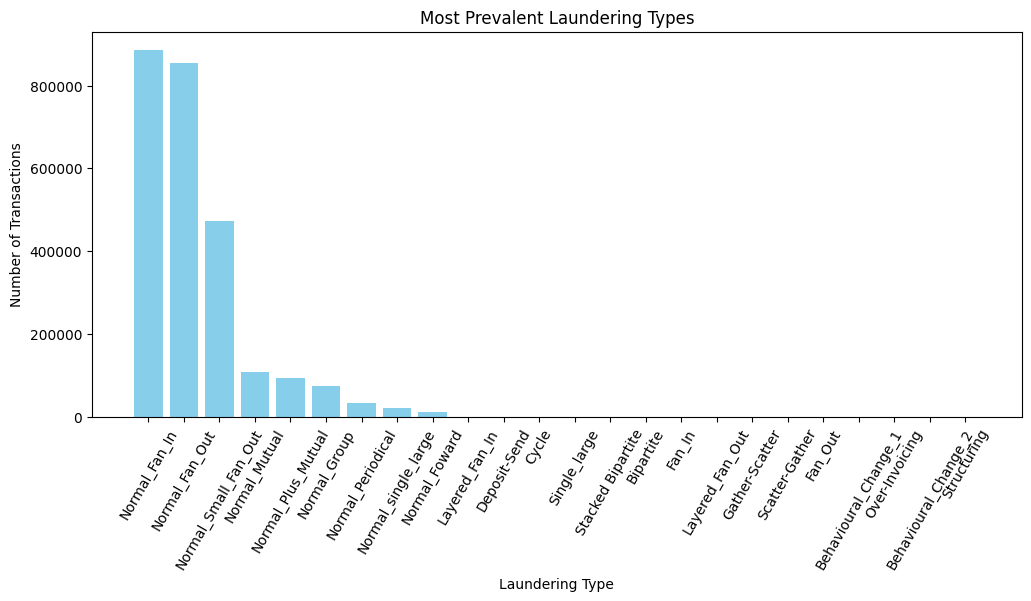

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.bar(laundering_counts['Laundering_type'], laundering_counts['Count'], color='skyblue')
plt.xlabel('Laundering Type')
plt.ylabel('Number of Transactions')
plt.title('Most Prevalent Laundering Types')
plt.xticks(rotation=60)
plt.show()
